# **Overview **

This cell imports the essential Python libraries needed for the analysis.

import pandas as pd: Imports the Pandas library, which is the cornerstone for data manipulation and analysis in Python. We use it to create and work with DataFrames (structured, table-like data).

import numpy as np: Imports the NumPy library, which is fundamental for scientific computing, especially for handling numerical operations and arrays.

import seaborn as sns and import matplotlib.pyplot as plt: These import the two main data visualization libraries. Matplotlib is a foundational plotting library, while Seaborn is built on top of it to create more statistically attractive and informative plots with less code.

sns.set(style="whitegrid"): This is an aesthetic choice that sets a clean, grid-based style for all subsequent Seaborn plots.



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Data**

Overview: This cell loads the data from its source on the internet and performs an initial inspection.

url: A string containing the direct web address of the raw data file.

column_names: A list of names for the columns. The raw data file does not have a header row, so we must provide these names ourselves.

pd.read_csv(...): This Pandas function reads the data.

names=column_names: Assigns our defined names to the columns.

na_values='?': This is a crucial step. It tells Pandas that any cell containing a question mark ('?') should be treated as a missing value (NaN).

df.head(): Displays the first 5 rows to give us a quick look at the data structure.

df.shape: Prints the dimensions of the DataFrame (number of rows, number of columns).

df.info(): Provides a concise summary of the DataFrame, including the data type of each column and the number of non-missing values. This is our first clue about missing data.



In [8]:
# 1. Load Data
# ---
# Load the dataset from the UCI Machine Learning Repository.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names, na_values='?')

print("--- Initial Data Overview ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nShape of the dataset:", df.shape)
print("\nData types and non-null values:")
df.info()

--- Initial Data Overview ---
First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Shape of the dataset: (303, 14)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex  

# **Data Cleaning**


Overview: This cell addresses the missing values identified in the previous step.

df.isnull().sum(): This command counts the number of missing (NaN) values in each column. We see that 'ca' and 'thal' have missing data.

Imputation Loop: Instead of dropping the rows (which would mean losing data), we impute them.

df[col].mode()[0]: For each column ('ca' and 'thal'), we calculate the mode, which is the most frequently occurring value. This is a good strategy for categorical or discrete data.

df.loc[:, col] = df[col].fillna(mode_val): We use .loc to access the column and fillna() to replace all NaN values with the calculated mode. Using .loc helps prevent a common SettingWithCopyWarning in Pandas.

astype(int): After filling the missing values, we convert the 'ca' and 'thal' columns to the integer data type, as they represent counts or categories.



In [9]:
# 2. Data Cleaning
# ---
# Handle missing values and correct data types.

print("\n--- Data Cleaning ---")
print("Missing values before cleaning:")
print(df.isnull().sum())

# Impute missing values in 'ca' and 'thal' with their mode.
for col in ['ca', 'thal']:
    mode_val = df[col].mode()[0]
    df.loc[:, col] = df[col].fillna(mode_val)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Convert 'ca' and 'thal' to integer types
df.loc[:, 'ca'] = df['ca'].astype(int)
df.loc[:, 'thal'] = df['thal'].astype(int)

print("\nData types after cleaning:")
df.info()


--- Data Cleaning ---
Missing values before cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalac

# **Target Variable Transformation**

Overview: This cell simplifies the problem from a multi-class to a binary classification task.

The Problem: The original 'target' column has values 0 (no disease) and 1, 2, 3, 4 (varying degrees of disease). For many models, it's easier to start by predicting a simple "yes" or "no".

The Solution: We use .loc and the .apply() method with a lambda function. This function checks each value in the 'target' column: if the value is greater than 0, it's replaced with 1 (disease present); otherwise, it remains 0 (no disease).

value_counts(): We print the counts of the new binary target to confirm our transformation was successful.



In [10]:
# 3. Target Variable Transformation
# ---
# The 'target' column has values from 0 (no disease) to 4.
# We will convert this to a binary classification problem: 0 (no disease) vs. 1 (disease).
print("\n--- Target Variable Transformation ---")
print("Original target value counts:")
print(df['target'].value_counts())

# Convert to binary: 0 = no disease, 1 = disease
df.loc[:, 'target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nBinary target value counts:")
print(df['target'].value_counts())


--- Target Variable Transformation ---
Original target value counts:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Binary target value counts:
target
0    164
1    139
Name: count, dtype: int64


# **Univariate Analysis**

Overview: This section analyzes each feature one by one to understand its distribution.

Histograms (sns.histplot): For numerical features ('age', 'chol', etc.), histograms are plotted. These charts show the frequency distribution of the data, allowing us to see if the data is normally distributed, skewed, or has multiple peaks.

Countplots (sns.countplot): For categorical features ('sex', 'cp', etc.), countplots are used. These are essentially bar charts that show the number of occurrences for each category, helping us understand the balance of our dataset.



In [11]:
# 4. Univariate Analysis
# ---
# Analyze individual features.

print("\n--- Univariate Analysis: Feature Distributions ---")

# Separate features into numerical and categorical
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']




--- Univariate Analysis: Feature Distributions ---


# **Histograms: Distribution of Numerical Features**

These plots show the distribution of individual numerical features. Think of them as bar charts for continuous data, telling you how many patients fall into different value ranges.

Distribution of age: The age distribution is fairly spread out and looks somewhat like a bell curve (normal distribution), peaking around the late 50s. This tells you the dataset contains a good mix of middle-aged to older adults.

Distribution of trestbps (Resting Blood Pressure): This distribution is slightly skewed to the right, with most patients having a resting blood pressure between 120 and 140. There are a few patients with very high values, which could be outliers.

Distribution of chol (Cholesterol): Similar to blood pressure, cholesterol levels are also right-skewed. A significant number of patients have high cholesterol levels (above 200), which is a known risk factor.

Distribution of thalach (Max Heart Rate Achieved): This looks reasonably normal, centered around 150-160. It shows the range of maximum heart rates patients achieved during the exercise test.

Distribution of oldpeak (ST Depression): This is heavily skewed to the right. Most patients have a value of 0, meaning no ST depression. This indicates that a high oldpeak value is an unusual and potentially significant finding.


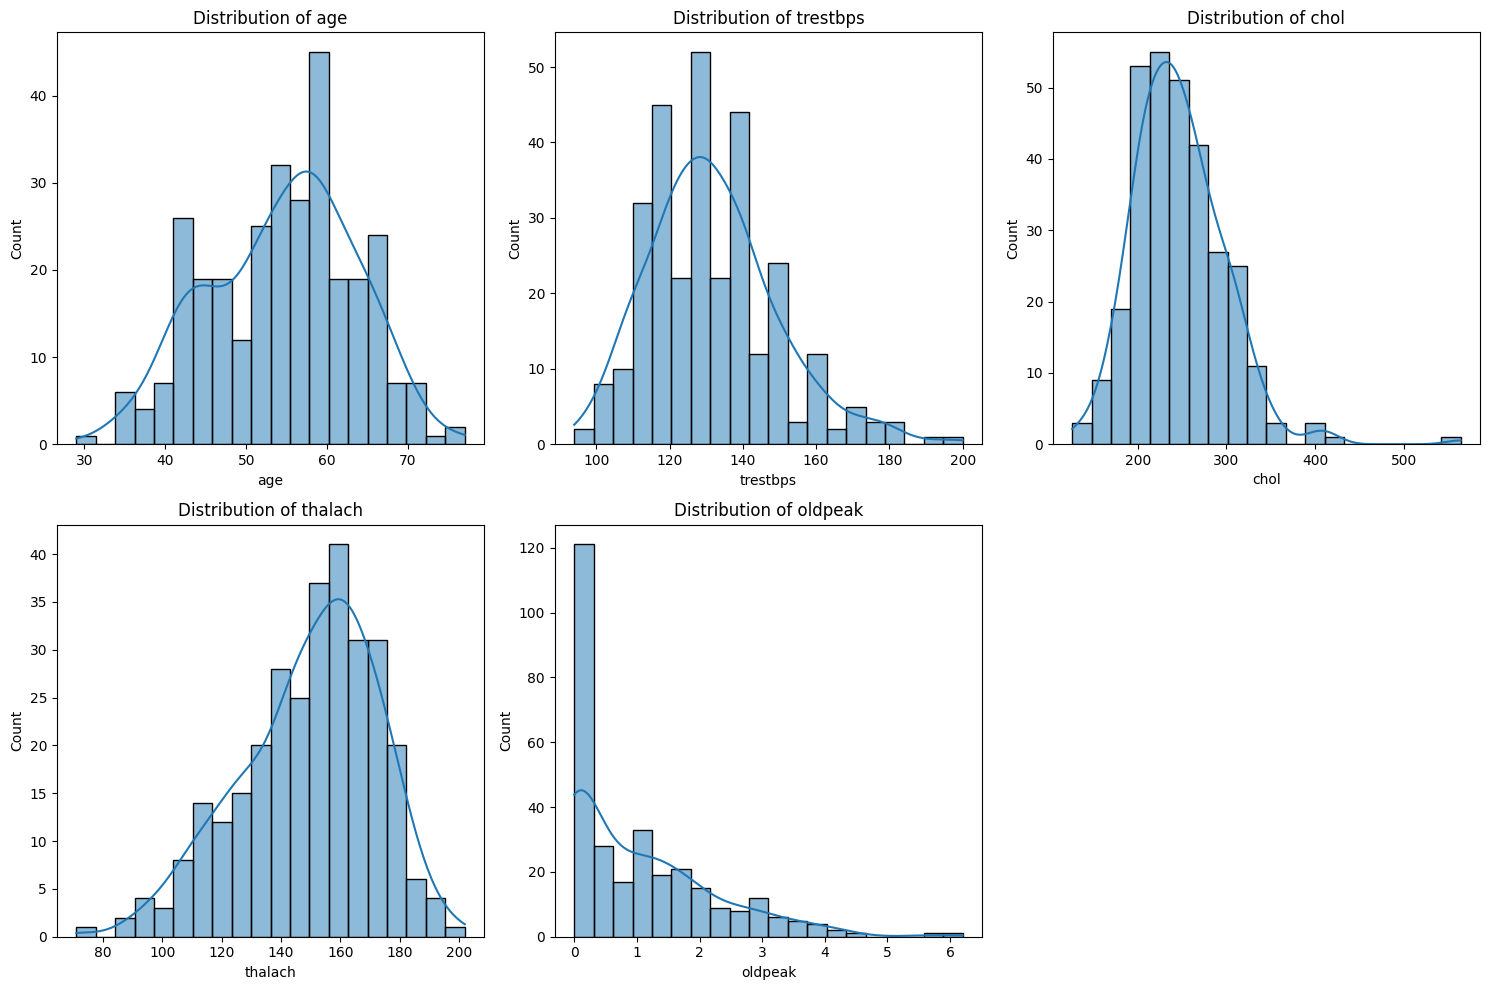

In [12]:
# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# **Countplots: Frequency of Categorical Features**

These plots are simple bar charts that show how many patients fall into each category for a given feature. They are perfect for understanding the composition of your dataset.

Count of sex: You have significantly more males (sex=1) than females (sex=0) in this dataset. This is an important imbalance to be aware of.

Count of cp (Chest Pain Type): The most common type is 0 (typical angina), while the other types are less frequent.

Count of fbs (Fasting Blood Sugar > 120 mg/dl): The vast majority of patients do not have high fasting blood sugar (fbs=0).

Count of exang (Exercise Induced Angina): More patients did not experience angina during exercise (exang=0) than those who did.



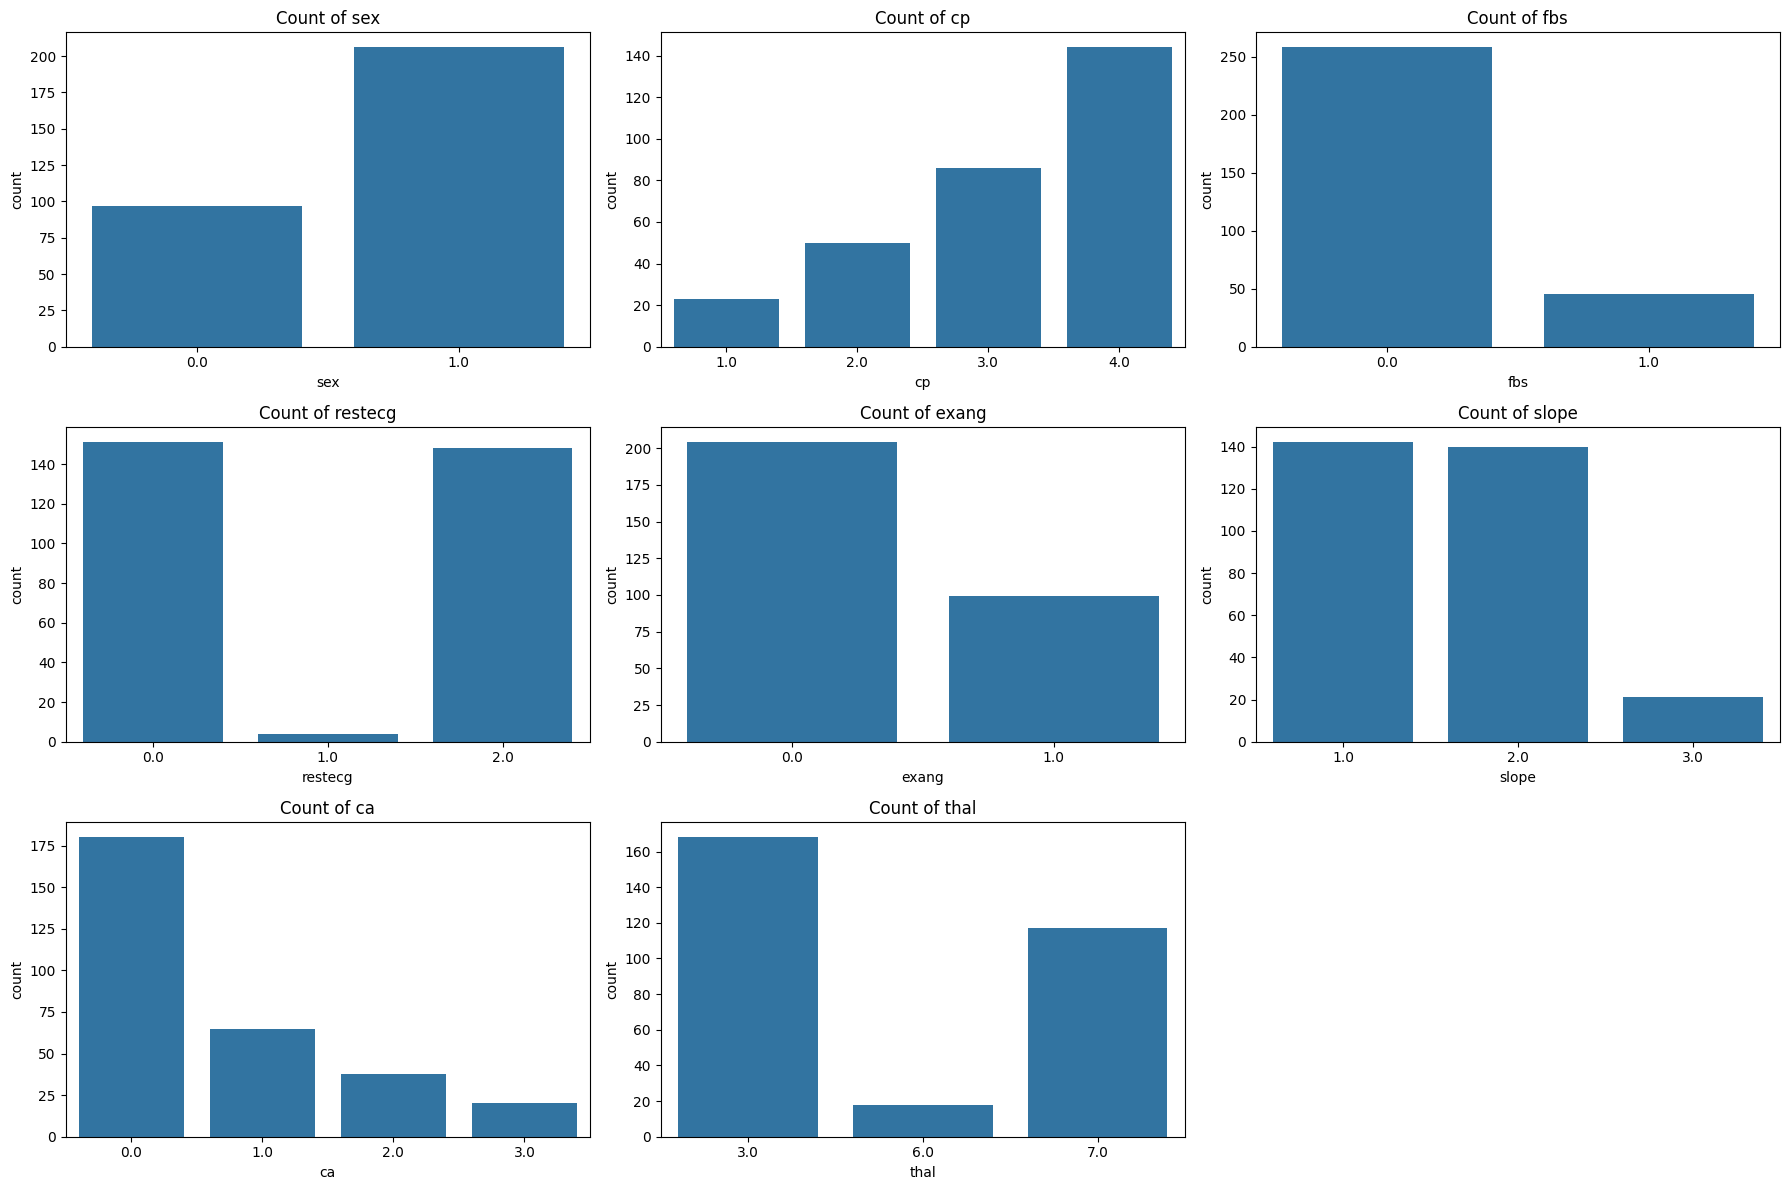

In [13]:
# Plot countplots for categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

Overview: Here, we investigate the relationship between each feature and the target variable (heart disease).

Boxplots (sns.boxplot): For numerical features, we use boxplots to compare the distribution of the feature for patients with heart disease versus those without. If the boxes for the two groups are very different, it suggests the feature is a good predictor. For example, a boxplot might show that the median 'thalach' (max heart rate) is higher for people without heart disease.

Countplots with hue: For categorical features, we again use countplots, but this time we add hue='target'. This splits the bar for each category into two colors, representing the count of patients with and without heart disease. This immediately shows which categories are more associated with the disease.




--- Bivariate Analysis: Features vs. Heart Disease ---


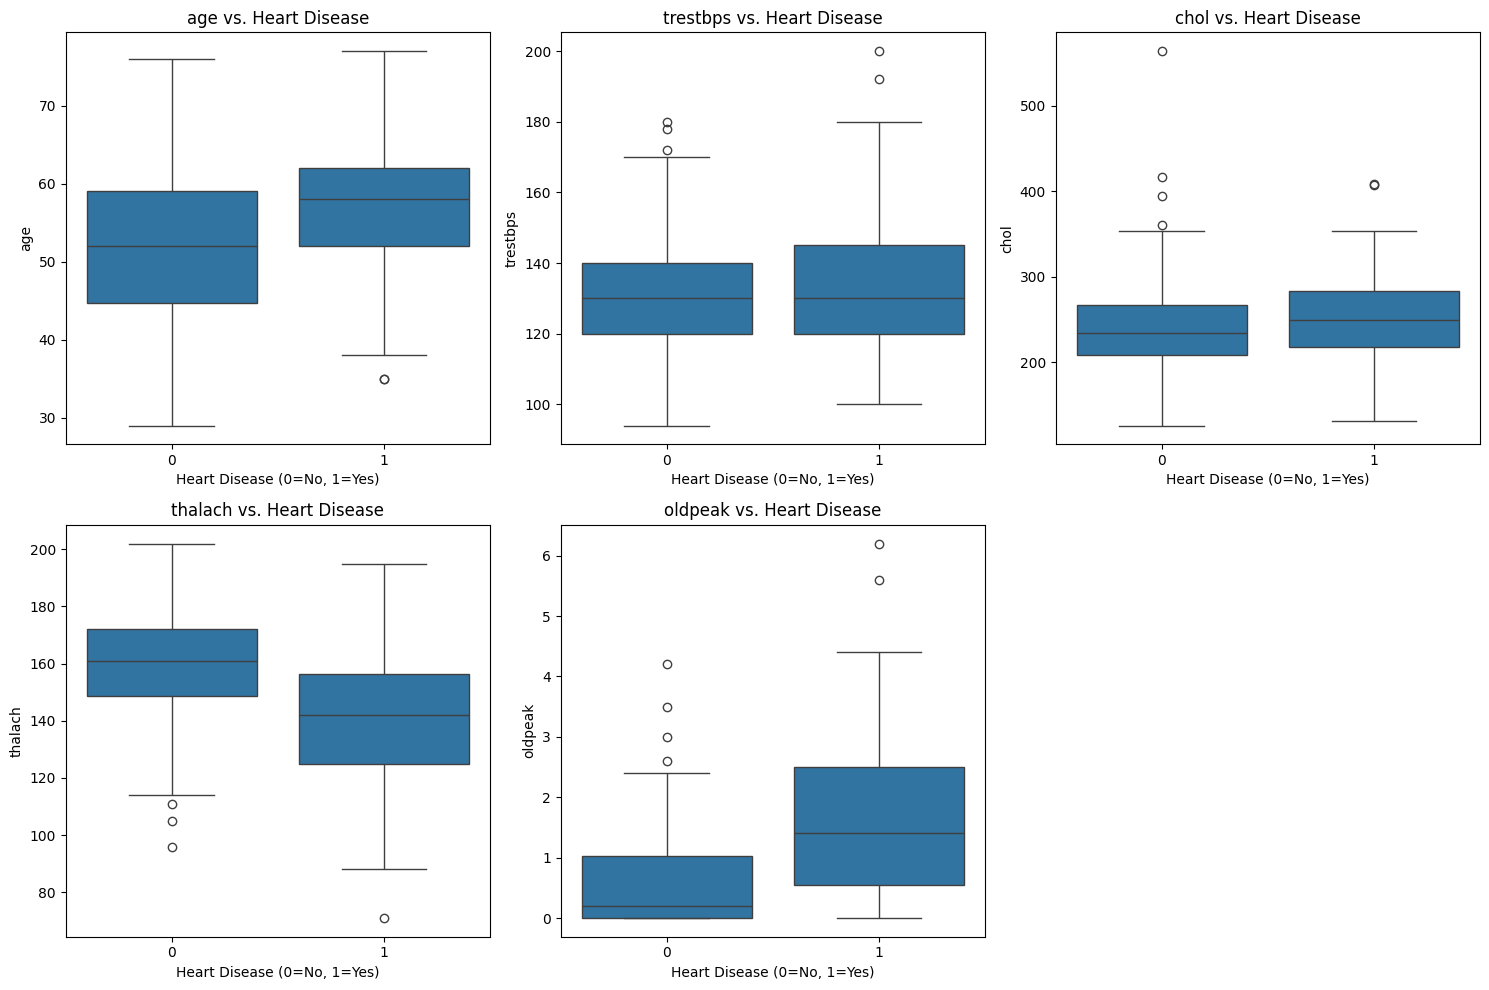

In [14]:
# 5. Bivariate Analysis
# ---
# Analyze the relationship between each feature and the target variable.

print("\n--- Bivariate Analysis: Features vs. Heart Disease ---")

# Numerical features vs. Target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs. Heart Disease')
    plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

# **Countplots with hue: Categorical Features vs. Heart Disease**

This is the categorical version of the boxplot. Each bar is split to show the proportion of patients with and without heart disease for each category.

cp (Chest Pain Type) vs. Heart Disease: This is very insightful. For patients with chest pain types 1, 2, and 3, the blue bar (No Disease) is larger than the orange bar (Disease). However, for cp=0 (typical angina), the orange bar is much larger. This tells you that other types of chest pain are less likely to be associated with heart disease in this dataset.

exang (Exercise Induced Angina) vs. Heart Disease: Patients with exercise-induced angina (exang=1) are much more likely to have heart disease (large orange bar).

sex vs. Heart Disease: While there are more males in the dataset, males also appear to have a higher proportion of heart disease compared to females.

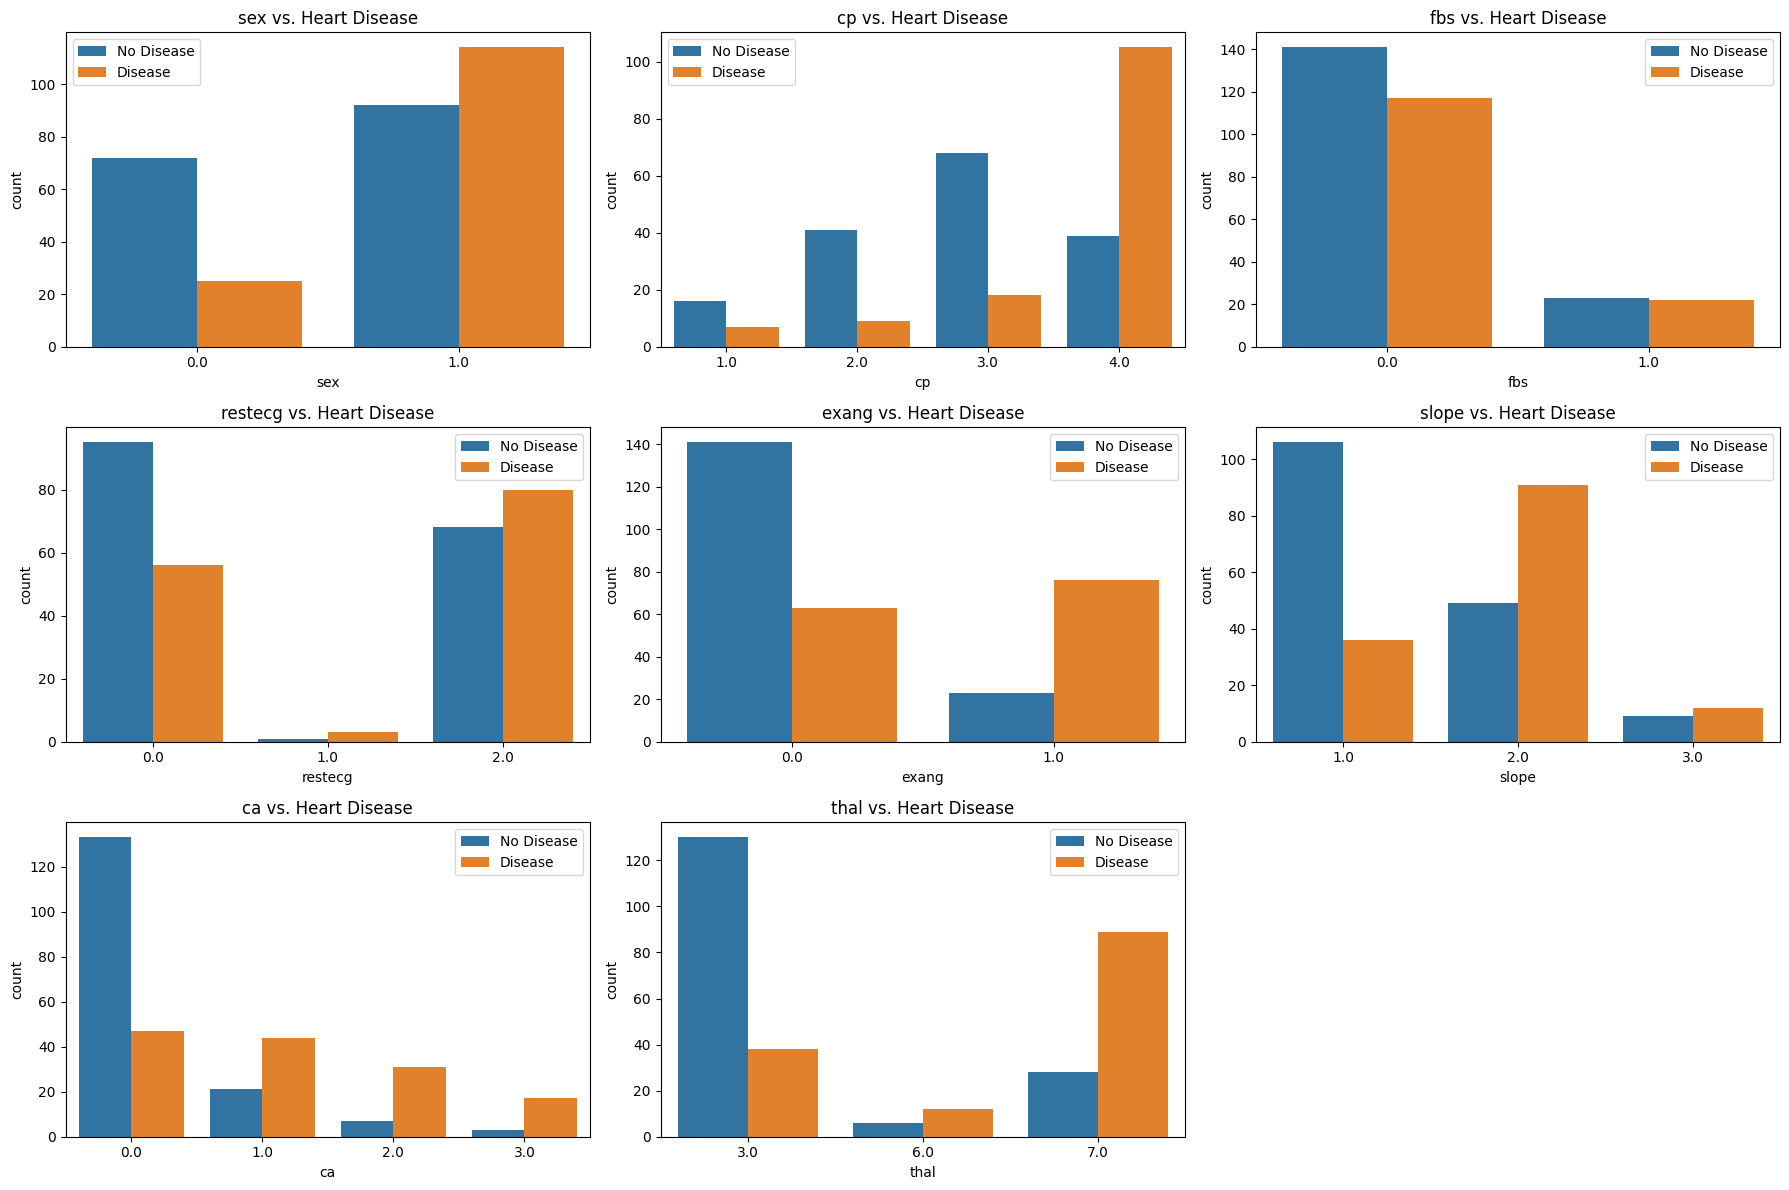

In [15]:
# Categorical features vs. Target
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs. Heart Disease')
    plt.xlabel(col)
    plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

# **Correlation Heatmap: Relationships Between Features**

The heatmap is a visual matrix that shows how every numerical feature relates to every other feature.

Colors: Warm colors (red/orange) mean a positive correlation (as one variable increases, the other tends to increase). Cool colors (blue) mean a negative correlation (as one increases, the other tends to decrease).

Key Findings from the 'target' row/column:

Negative Correlations: thalach has the strongest negative correlation with target (-0.42). This confirms what we saw in the boxplot: higher max heart rate is linked to a lower chance of disease.

Positive Correlations: oldpeak and ca have strong positive correlations with target. This also confirms our earlier findings: higher values in these features are linked to a higher chance of disease.

Other Correlations: You can see that age and thalach are negatively correlated (-0.4). This makes sense, as maximum heart rate tends to decrease with age.



--- Multivariate Analysis ---


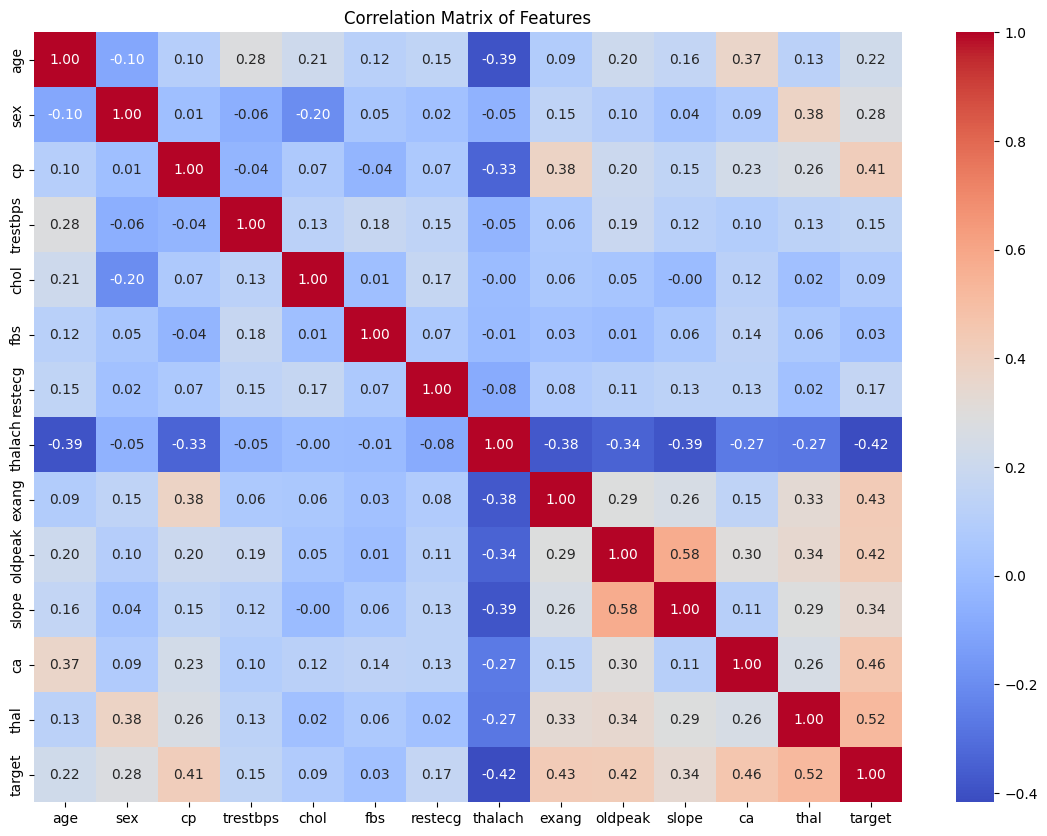

In [16]:
# 6. Multivariate Analysis
# ---
# Explore relationships among multiple features.

print("\n--- Multivariate Analysis ---")

# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# **Pairplot: The Big Picture**

The pairplot is a fantastic summary tool. It shows scatter plots for every pair of features and histograms for each individual feature, all colored by the target variable.

What to look for: You are looking for scatter plots where the orange dots (target=1) and green dots (target=0) are well-separated. This separation indicates that the combination of those two features is a good predictor of heart disease.

Example: thalach vs. oldpeak (not shown, but can be inferred): If you were to plot these two, you would likely see a good separation. Patients with high thalach and low oldpeak (green dots) would cluster in one area, while patients with low thalach and high oldpeak (orange dots) would cluster in another. This visual confirmation is the goal of the pairplot.



Generating Pairplot (this may take a moment)...


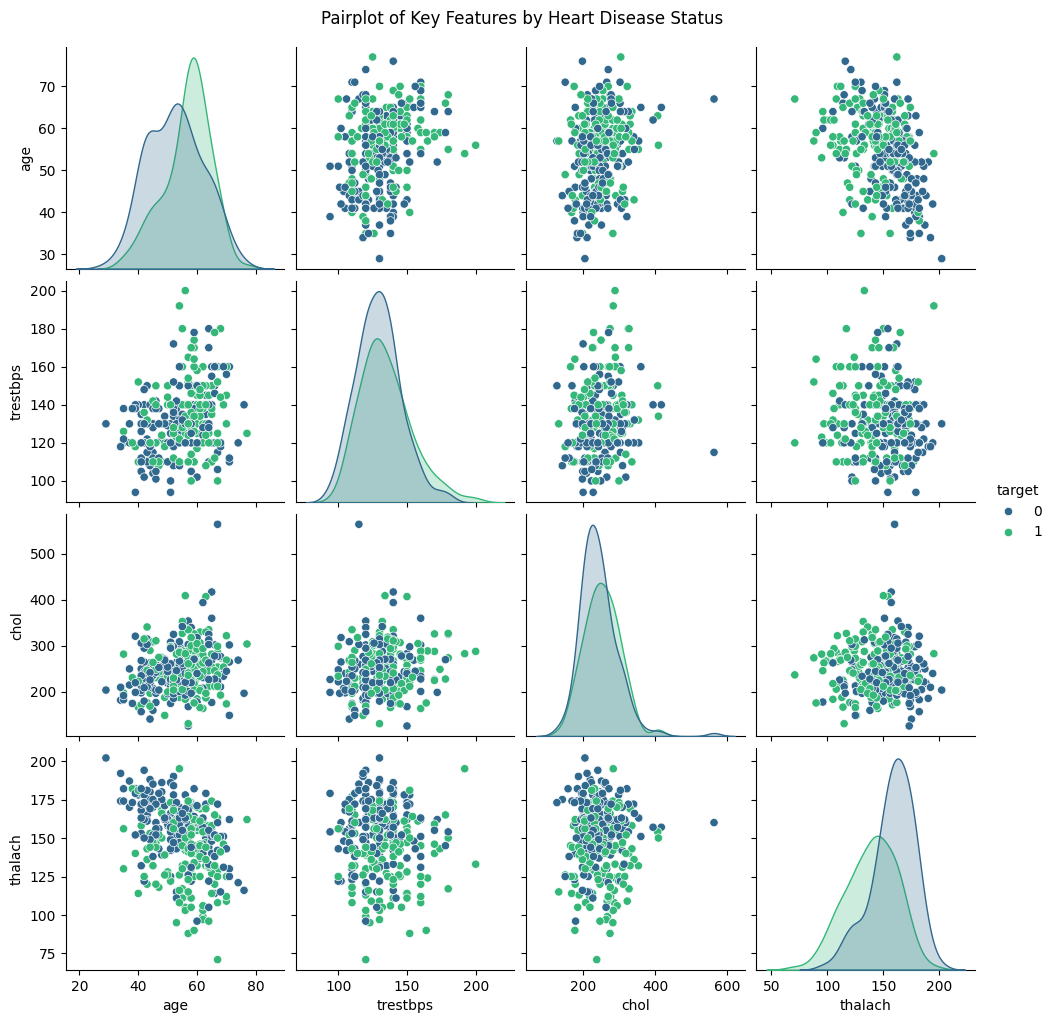

In [17]:
# Pairplot to visualize relationships between selected features, colored by target
print("\nGenerating Pairplot (this may take a moment)...")
selected_features_for_pairplot = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features_for_pairplot], hue='target', palette='viridis')
plt.suptitle('Pairplot of Key Features by Heart Disease Status', y=1.02)
plt.show()

In [18]:
# 7. Summary of EDA Findings
# ---
print("\n--- EDA Summary ---")
print("""
1.  **Data Quality**: The dataset is clean after imputing a small number of missing values in 'ca' and 'thal' using the mode.
2.  **Distributions**:
    * Age has a relatively normal distribution.
    * Cholesterol ('chol') and resting blood pressure ('trestbps') have some high outliers.
    * The dataset has more male (sex=1) than female (sex=0) patients.
3.  **Key Relationships with Heart Disease**:
    * **Higher 'thalach'** (max heart rate) is associated with a lower chance of heart disease.
    * **Higher 'oldpeak'** (ST depression) is strongly associated with a higher chance of heart disease.
    * **Chest pain type ('cp')**: Non-anginal pain (cp=2) is less indicative of heart disease compared to other types.
    * **Exercise-induced angina ('exang')**: Patients without it (exang=0) are less likely to have heart disease.
    * **Number of major vessels ('ca')**: A lower number is associated with less disease.
4.  **Correlations**: 'thalach' and 'age' have a moderate negative correlation. 'oldpeak' and 'slope' are also correlated.
""")



--- EDA Summary ---

1.  **Data Quality**: The dataset is clean after imputing a small number of missing values in 'ca' and 'thal' using the mode.
2.  **Distributions**:
    * Age has a relatively normal distribution.
    * Cholesterol ('chol') and resting blood pressure ('trestbps') have some high outliers.
    * The dataset has more male (sex=1) than female (sex=0) patients.
3.  **Key Relationships with Heart Disease**:
    * **Higher 'thalach'** (max heart rate) is associated with a lower chance of heart disease.
    * **Higher 'oldpeak'** (ST depression) is strongly associated with a higher chance of heart disease.
    * **Chest pain type ('cp')**: Non-anginal pain (cp=2) is less indicative of heart disease compared to other types.
    * **Exercise-induced angina ('exang')**: Patients without it (exang=0) are less likely to have heart disease.
    * **Number of major vessels ('ca')**: A lower number is associated with less disease.
4.  **Correlations**: 'thalach' and 'age' have a 